## For this project you will use `requests` package and the SODA API to access data through https://data.nashville.gov/. We'll start out with something familiar, the [Top 500 Monthly Searches](https://data.nashville.gov/Public-Services/Nashville-gov-Top-500-Monthly-Searches/fuaa-r5cm), then pull in different datasets further on. You will make different API requests for each individual question.

In [2]:
import requests
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
endpoint1 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response1 = requests.get(endpoint1)

In [3]:
response1.text

'[{"month_name":"January","year":"2014","query_count":"223","query_text":"ebid"}\n,{"month_name":"January","year":"2014","query_count":"112","query_text":"property maps"}\n,{"month_name":"January","year":"2014","query_count":"97","query_text":"maps"}\n,{"month_name":"January","year":"2014","query_count":"90","query_text":"property tax"}\n,{"month_name":"January","year":"2014","query_count":"76","query_text":"jobs"}\n,{"month_name":"January","year":"2014","query_count":"75","query_text":"employment"}\n,{"month_name":"January","year":"2014","query_count":"73","query_text":"human resources"}\n,{"month_name":"January","year":"2014","query_count":"62","query_text":"police"}\n,{"month_name":"January","year":"2014","query_count":"61","query_text":"criminal court clerk"}\n,{"month_name":"January","year":"2014","query_count":"53","query_text":"media releases"}\n,{"month_name":"January","year":"2014","query_count":"50","query_text":"property taxes"}\n,{"month_name":"January","year":"2014","query

## Questions

#### 1. Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?  

In [4]:
params = {
    'year': '2016',
    'query_text' : 'fire'
}

In [5]:
yr_2016 = requests.get(endpoint1, params = params).json()
yr_2016

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

Changing the list of dictionaries to just nested dictionaries for my for loop

In [6]:
yr_2016_df = pd.DataFrame(yr_2016)
yr_2016_df.drop(columns=['query_text']).sort_values('query_count', ascending = False)

,month_name,year,query_count
7,August,2016,47
9,October,2016,38
11,December,2016,38
8,September,2016,36
1,February,2016,35
2,March,2016,32
10,November,2016,32
5,June,2016,31
3,April,2016,26
4,May,2016,24


August had the highest 'fire' search count in the year 2016 with 47 searches.

#### 2. Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur? 

In [3]:
endpoint2 = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

response2 = requests.get(endpoint2)

In [8]:
response2

<Response [200]>

In [9]:
response2.json()

[{'month_name': 'January',
  'year': '2014',
  'query_count': '223',
  'query_text': 'ebid'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '112',
  'query_text': 'property maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '90',
  'query_text': 'property tax'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '76',
  'query_text': 'jobs'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '75',
  'query_text': 'employment'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '73',
  'query_text': 'human resources'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '62',
  'query_text': 'police'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '61',
  'query_text': 'criminal court clerk'},
 {'month_name': 'January',
  'year': '2014',
  'query_count': '53',
  'query_text': 'media releases'},
 {'mon

In [14]:
params2 = {
    '$limit': '50000',
    '$where': 'query_count > 100'
}

In [15]:
querries_greater_100 = requests.get(endpoint2, params2).json()
len(querries_greater_100)

1262

There were 1,262 occurences when a query was ran more than 100 times in a month.

#### 3. Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?  

In [12]:
endpoint3 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000&$where=query_count > 100'

response3 = requests.get(endpoint2)

In [13]:
response3

<Response [200]>

In [14]:
params3 = {
    'query_text' : 'codes'
}

In [15]:
code_query = requests.get(endpoint3, params = params3)

In [16]:
code_query.json()

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'July',
  'month': '7',
  'year': '2021',
  'query_count': '114',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'

In [17]:
len(code_query.json())

56

There were 56 occurences when a query for 'codes' was ran more than 100 times in a month.

#### 4. Make an API request that returns the entire Top 500 Monthly Searches dataset. Make a chart that shows the number of times "maps" was searched in a month across the entire time frame. 

In [18]:
endpoint4 = 'https://data.nashville.gov/resource/fuaa-r5cm.json?$limit=50000'

response4 = requests.get(endpoint4)

In [19]:
response4

<Response [200]>

In [20]:
params4 = {
    'query_text' : 'maps'
}

In [21]:
map_query = requests.get(endpoint4, params = params4)

In [22]:
maps = map_query.json()
maps

[{'month_name': 'January',
  'year': '2014',
  'query_count': '97',
  'query_text': 'maps'},
 {'month_name': 'February',
  'year': '2014',
  'query_count': '140',
  'query_text': 'maps'},
 {'month_name': 'March',
  'year': '2014',
  'query_count': '144',
  'query_text': 'maps'},
 {'month_name': 'April',
  'year': '2014',
  'query_count': '152',
  'query_text': 'maps'},
 {'month_name': 'May',
  'year': '2014',
  'query_count': '119',
  'query_text': 'maps'},
 {'month_name': 'June',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'July',
  'year': '2014',
  'query_count': '121',
  'query_text': 'maps'},
 {'month_name': 'August',
  'year': '2014',
  'query_count': '118',
  'query_text': 'maps'},
 {'month_name': 'September',
  'year': '2014',
  'query_count': '115',
  'query_text': 'maps'},
 {'month_name': 'October',
  'year': '2014',
  'query_count': '100',
  'query_text': 'maps'},
 {'month_name': 'November',
  'year': '2014',
  'query_count': '82',
  'q

In [23]:
maps_df =pd.DataFrame(maps)

In [24]:
maps_df = maps_df.drop(columns = ['query_text', 'month'])
maps_df

,month_name,year,query_count
0,January,2014,97
1,February,2014,140
2,March,2014,144
3,April,2014,152
4,May,2014,119
...,...,...,...
77,November,2020,86
78,December,2020,113
79,March,2021,132
80,April,2021,148


creating clustered bar chart, clustered by year

In [25]:
maps_df['query_count'] = maps_df['query_count'].astype(int)

In [26]:
import seaborn as sns

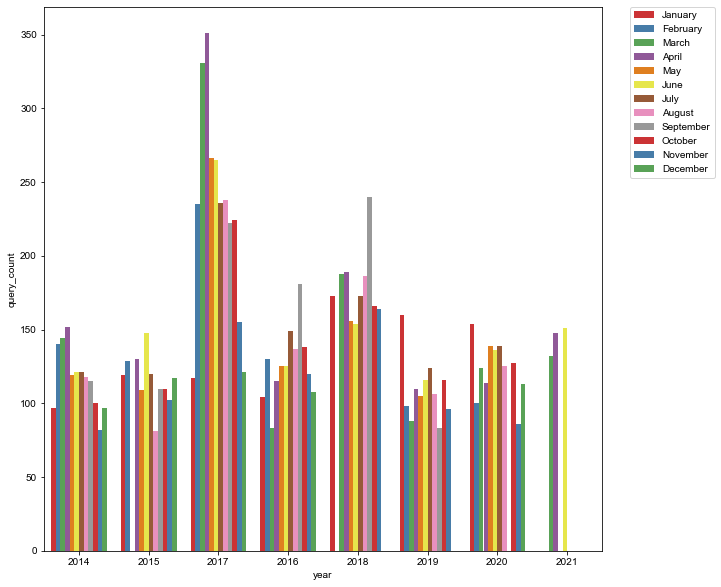

In [27]:
fig, ax = plt.subplots(figsize=(10,10))
sns.barplot(data=maps_df, y='query_count', x='year', hue='month_name', palette='Set1')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
sns.set(font_scale = 2)
plt.show()